# Защита персональных данных клиентов

## Загрузка данных

Импортируем библиотеки

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.datasets import make_spd_matrix
from sklearn.metrics import r2_score

Загрузим данные из файла, посмотрим содержимое

In [2]:
data = pd.read_csv('/datasets/insurance.csv')
display(data.head())

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


Посмотрим информацию о датафрейме

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


Пропусков нет. У столбцов "Возраст" и "Зарплата", тип данных- float, при этом значения там целочисленные. Изменим тип данных на int64

In [4]:
data['Возраст'] = data['Возраст'].astype('int64')
data['Зарплата'] = data['Зарплата'].astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Пол                5000 non-null   int64
 1   Возраст            5000 non-null   int64
 2   Зарплата           5000 non-null   int64
 3   Члены семьи        5000 non-null   int64
 4   Страховые выплаты  5000 non-null   int64
dtypes: int64(5)
memory usage: 195.4 KB


Проверим на дубликаты.

In [5]:
display(data.duplicated().sum())

153

Имеем 153 дубликата. Удалим их.

In [6]:
data = data.drop_duplicates().reset_index(drop=True)
display(data.shape)

(4847, 5)

In [7]:
display(data.describe())

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,4847.000000,4847.000000,4847.000000,4847.000000,4847.000000
mean,0.498453,31.023932,39895.811223,1.203425,0.152259
std,0.500049,8.487995,9972.952441,1.098664,0.468934
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33200.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


Аномальных значений нет. Возраст- от 18 до 65, зарплата- от 5300 до 79000. Можем приступать к задаче.

**Вывод:**
1) Импортировали библиотеки, загрузили данные.

2) Провели предобработку, удалили дубликаты.

Построим гистограммы:

'Возраст'

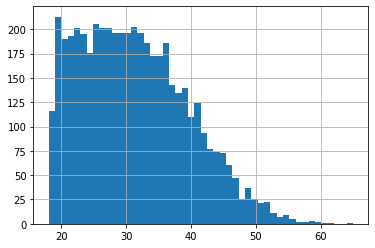

'Зарплата'

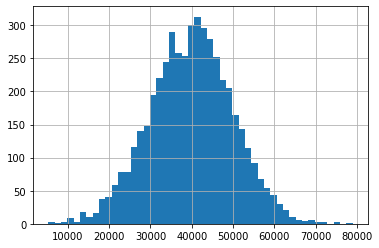

'Члены семьи'

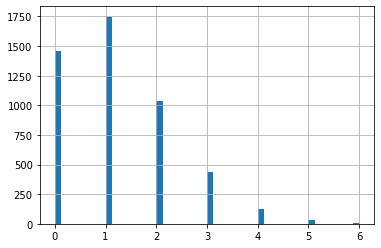

'Страховые выплаты'

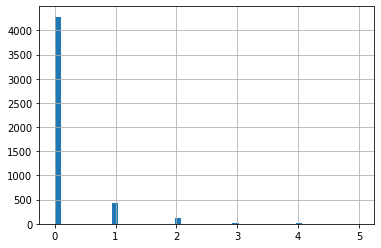

In [8]:
for i in data.iloc[:,[1,2,3,4]].columns:
    display(i)
    data[i].hist(bins=48)
    plt.show()

1) Возраст- количество клиентов максимальное в возрасте примерно до 40 лет, потом начинает убывать. Нормальное распределение.

2) Большинство клиентов имеет зарплату 40-45 тыс.р. Нормальное распределение

3) У большинства клиентов от 0 до 2 членов семьи.

4) Абсолютное большинство клиентов не получало страховые выплаты. Большинство из тех кто выплаты получал, получали только одну выплату.

Построим круговые диаграммы для столбцов "страховые выплаты" и "члены семьи".

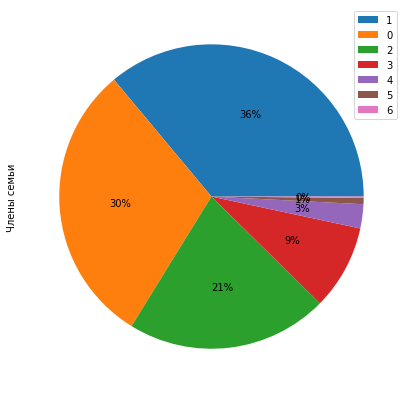

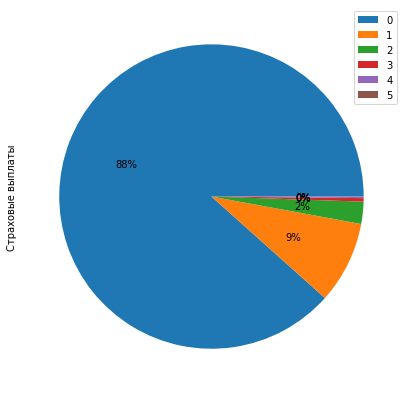

In [9]:
for i in data.iloc[:,[3,4]].columns:
    plt.figure(figsize=(7, 7))
    data[i].value_counts().plot(kind='pie', autopct='%1.0f%%', labeldistance=None, legend=True)
    plt.show()

1) 87% клиентов имеют от 0 до 2 членов семьи.

2) 88% клиентов не получали страховых выплат, 9% получали по 1 страховой выплате.

## Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** Не изменится

**Обоснование:** Обозначим обратимую матрицу как P. Формула обучения, в которой мы умножили исходную матрицу на обратимую, будет выглядеть так:
$ w'=((XP)^{T}(XP))^{-1}(XP)^{T}y $

Преобразуем формулу:

$((XP)^{T}(XP))^{-1}(XP)^{T}y = (P^{T}X^{T}XP)^{-1}P^{T}X^{T}y = P^{-1}(X^{T}X)^{-1}P^{T^{-1}}P^{T}X^{T}y = P^{-1}w $

Таким образом, $ w = P^{-1}w $

Подставим это в формулу предсказаний:

$a'= XP*w' = XPP^{-1}w = Xw = a$

Получается, умножение исходной матрицы на обратимую, не влияет на предсказания.

**Вывод:**

Качество линейной регрессии не изменится

## Алгоритм преобразования

**Алгоритм**

Сгенерируем случайную обратимую матрицу P, и умножим на нее исходную матрицу X. В качестве матрицы X, у нас будет выступать матрица с признаками, которую мы выделим из исходного датафрейма (будет сохранена в переменной features).
Результат ее умножения- features_P.

**Обоснование**

Как было доказано выше, выполнив впоследствии умножение на матрицу $P^{-1}$, сможем декодировать признаки из матрицы $XP$.

**Вывод:**

Выбрали алгоритм, далее проверим его.

## Проверка алгоритма

Первым делом, отделим целевой признак.

In [10]:
features = data.drop('Страховые выплаты', axis=1)
target = data['Страховые выплаты']
display(features.head())
display(target.head())

,Пол,Возраст,Зарплата,Члены семьи
0,1,41,49600,1
1,0,46,38000,1
2,0,29,21000,0
3,0,21,41700,2
4,1,28,26100,0


0    0
1    1
2    0
3    0
4    0
Name: Страховые выплаты, dtype: int64

Разобьем исходные данные на обучающую и тестовую выборку. Проверим результат.

In [11]:
features_train, features_test, target_train, target_test = train_test_split(features, target,
                                                                            test_size=0.25, random_state=1234)
display(features_train.shape[0], features_test.shape[0], target_train.shape[0], target_test.shape[0])

3635

1212

3635

1212

Выборки создали корректно. Теперь создадим обратимую матрицу:

In [12]:
loc = np.random.randint(2,5)
std = np.random.randint(2,5)
P = np.random.normal(loc, std, size=(4,4)).astype('int64')
display(P)

array([[1, 8, 0, 3],
       [2, 0, 5, 1],
       [5, 6, 3, 0],
       [9, 2, 0, 7]])

Проверим ее на обратимость:

In [13]:
try:
    np.linalg.inv(P)
    display('Матрица обратима')
except:
    display('Матрица не обратима')

'Матрица обратима'

Теперь умножим матрицу с признаками на только что сгенерированную матрицу:

In [14]:
features_P = features@P
display(features_P.head())

,0,1,2,3
0,248092,297610,149005,51
1,190101,228002,114230,53
2,105058,126000,63145,29
3,208560,250204,125205,35
4,130557,156608,78440,31


Проверим результат умножения на обратимую матрицу, и убедимся, что удалось получить исходные признаки.

In [15]:
check_matrix = features_P@np.linalg.inv(P)
check_matrix = check_matrix.astype('int64')
display(check_matrix.head())
display(features.head())

,0,1,2,3
0,1,40,49599,1
1,0,45,38000,1
2,0,28,21000,0
3,0,20,41700,2
4,1,27,26100,0


,Пол,Возраст,Зарплата,Члены семьи
0,1,41,49600,1
1,0,46,38000,1
2,0,29,21000,0
3,0,21,41700,2
4,1,28,26100,0


Результат соответствует ожиданиям. Разобьем шифрованные данные на выборки:

In [16]:
features_P_train, features_P_test = train_test_split(features_P, test_size=0.25, random_state=1234)

Теперь можем создать модель линейной регрессии.

In [17]:
class LinearRegression:
    def fit(self, f_train, t_train):
        f_train_matrix = np.concatenate((np.ones((f_train.shape[0], 1)), f_train), axis=1)
        t_train_vector = np.array(t_train)       
        w = np.linalg.inv(f_train_matrix.T @ f_train_matrix) @ f_train_matrix.T @ t_train_vector
        self.w = w[1:]
        self.w0 = w[0]
        print(self.w)
        print()
        return self.w, self.w0  
 
    def predict(self, f_test):
        f_test_matrix = f_test.values
        a = f_test_matrix @ self.w + self.w0 
        return a    

Проверим r2 на исходных данных

In [18]:
model = LinearRegression()
model.fit(features_train, target_train)
predicted = pd.Series(model.predict(features_test))
r2 = r2_score(target_test, predicted)
display('R2-Score:', r2)

[-2.01781615e-03  3.63699909e-02 -9.82822884e-08 -1.24040362e-02]



'R2-Score:'

0.4214584788072573

Теперь проверим на шифрованных данных:

In [19]:
model.fit(features_P_train, target_train)
predicted = pd.Series(model.predict(features_P_test))
r2_cripto = r2_score(target_test, predicted)
display('R2-Score из зашифрованных данных', r2_cripto)

[-0.00365553 -0.00100046  0.00809345  0.00321381]



'R2-Score из зашифрованных данных'

0.42145847835117867

**Вывод:**
1) Разбили данные на тестовую и обучающую выборки.

2) Создали обратимую матрицу

3) Создали алгоритм линейной регрессии и проверили гипотезу.

4) Гипотеза о том, что данные можно шифровать с помощью умножения на обратимую матрицу, не теряя в качестве предсказаний, подтвердилась: r2-score практически идентичен.